파이썬을 이용하여 전처리 및 EDA를 진행해주세요.
- 결측치, 이상치 검토
- 유의미한 시각화 5개 이상
- 수치형 변수 간 상관관계 파악
- 파생변수 생성

# 0. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IBM_HR.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# 수치형 데이터 정보
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 1.결측치 검토

In [6]:
print('Number of Unique Values')
print('='*40)
for col in df.columns : 
    print('{:<25} => {:>10}'.format(col, len(df[col].unique())))

Number of Unique Values
Age                       =>         43
Attrition                 =>          2
BusinessTravel            =>          3
DailyRate                 =>        886
Department                =>          3
DistanceFromHome          =>         29
Education                 =>          5
EducationField            =>          6
EmployeeCount             =>          1
EmployeeNumber            =>       1470
EnvironmentSatisfaction   =>          4
Gender                    =>          2
HourlyRate                =>         71
JobInvolvement            =>          4
JobLevel                  =>          5
JobRole                   =>          9
JobSatisfaction           =>          4
MaritalStatus             =>          3
MonthlyIncome             =>       1349
MonthlyRate               =>       1427
NumCompaniesWorked        =>         10
Over18                    =>          1
OverTime                  =>          2
PercentSalaryHike         =>         15
PerformanceRatin

In [7]:
print('Percentage of missing values')
print('='*40)
for col in df.columns :
    print('{:<25} => {:>10.2f}%'.format(col, len(df.isnull())/len(df)*100))

Percentage of missing values
Age                       =>     100.00%
Attrition                 =>     100.00%
BusinessTravel            =>     100.00%
DailyRate                 =>     100.00%
Department                =>     100.00%
DistanceFromHome          =>     100.00%
Education                 =>     100.00%
EducationField            =>     100.00%
EmployeeCount             =>     100.00%
EmployeeNumber            =>     100.00%
EnvironmentSatisfaction   =>     100.00%
Gender                    =>     100.00%
HourlyRate                =>     100.00%
JobInvolvement            =>     100.00%
JobLevel                  =>     100.00%
JobRole                   =>     100.00%
JobSatisfaction           =>     100.00%
MaritalStatus             =>     100.00%
MonthlyIncome             =>     100.00%
MonthlyRate               =>     100.00%
NumCompaniesWorked        =>     100.00%
Over18                    =>     100.00%
OverTime                  =>     100.00%
PercentSalaryHike         =>

# 1. EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

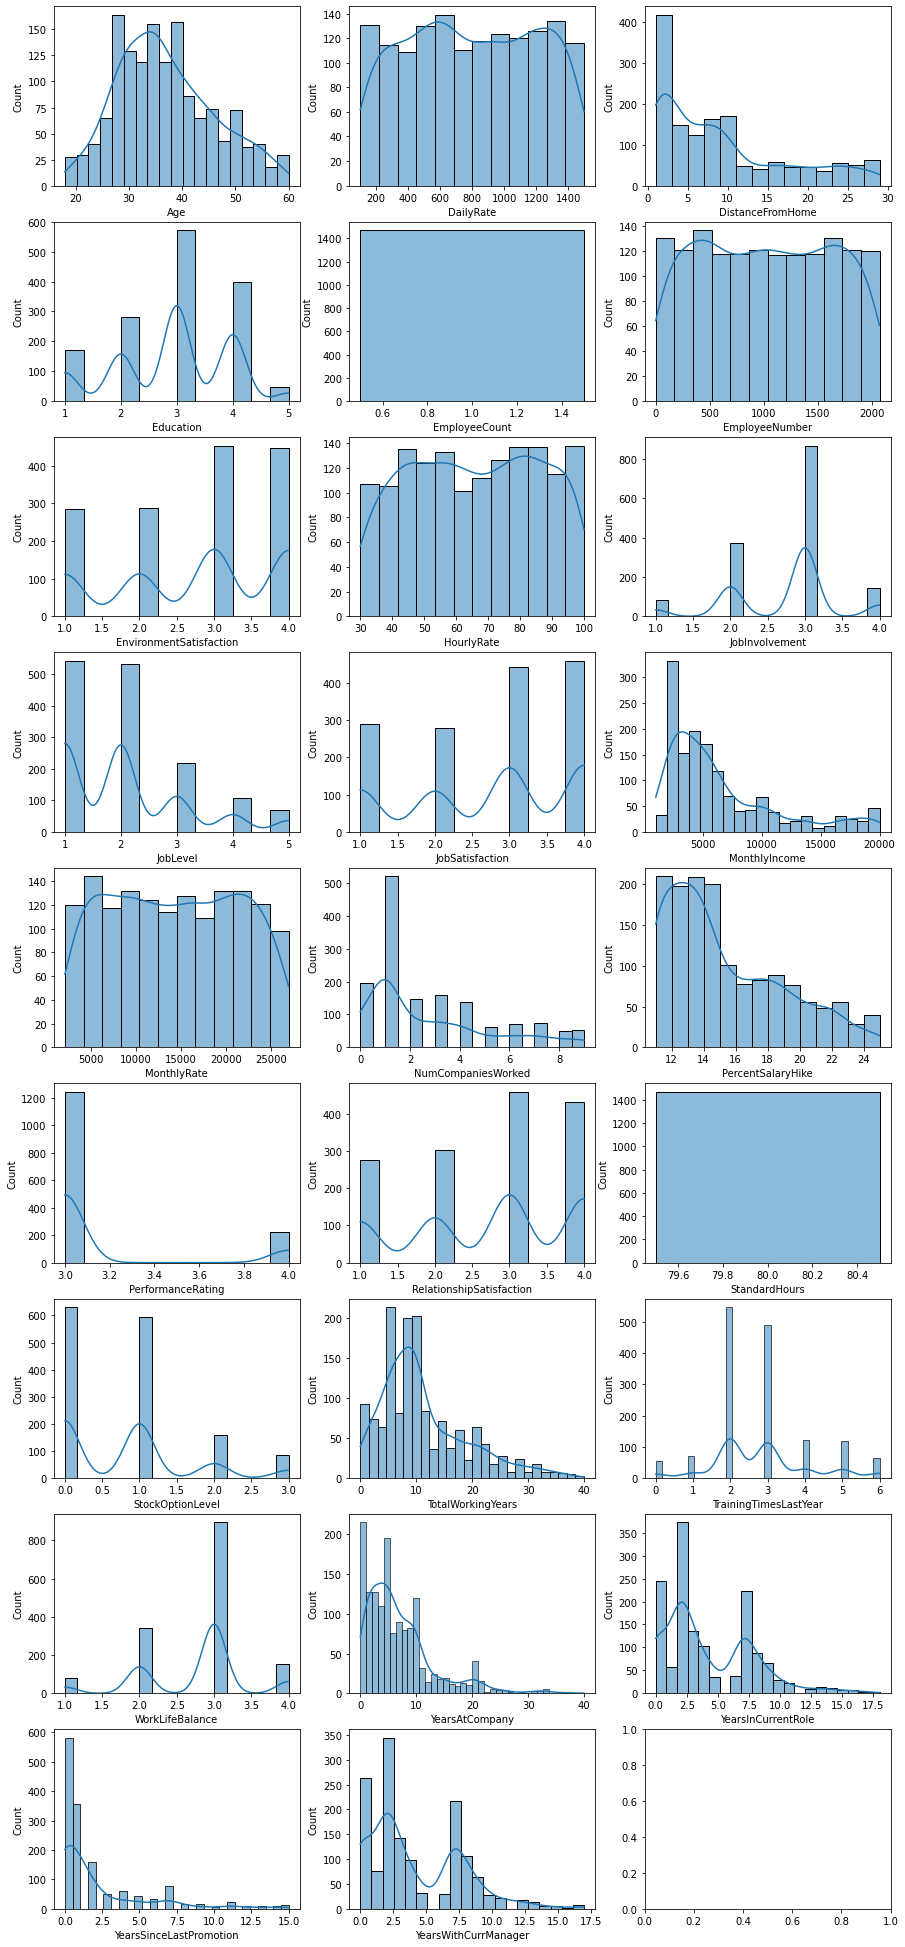

In [9]:
# 수치형 데이터 살펴보기
numeric_cols = df.select_dtypes(include='int64').columns

f, ax = plt.subplots(9,3, figsize=(15,35))

for i,col in enumerate(numeric_cols) :
    plt.subplot(9,3,i+1)
    sns.histplot(df[col], kde=True)

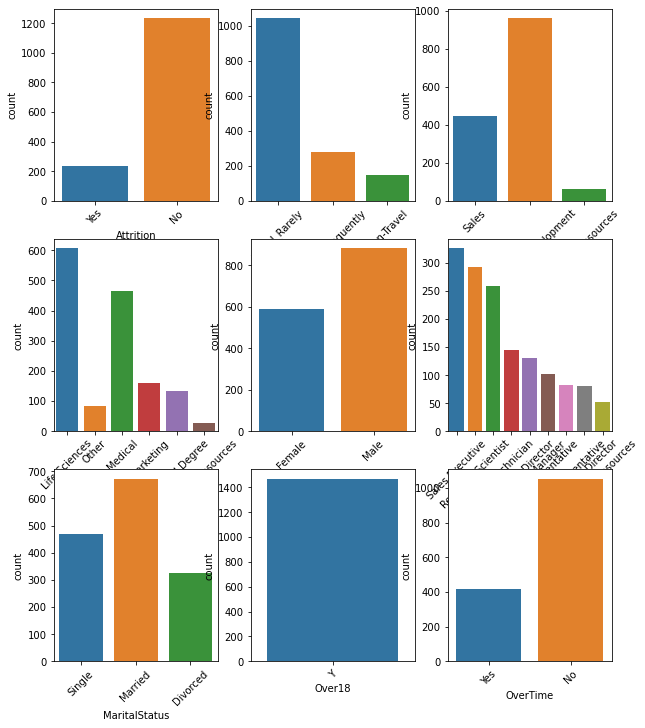

In [10]:
# 범주형 데이터 살펴보기
non_numeric_cols = df.select_dtypes(include='object').columns

plt.subplots(3,3, figsize=(10,12))

for i,col in enumerate(non_numeric_cols) :
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=45)
    sns.countplot(x=df[col])

In [11]:
non_numeric_cols.drop('Attrition')

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Between Numeric Features')

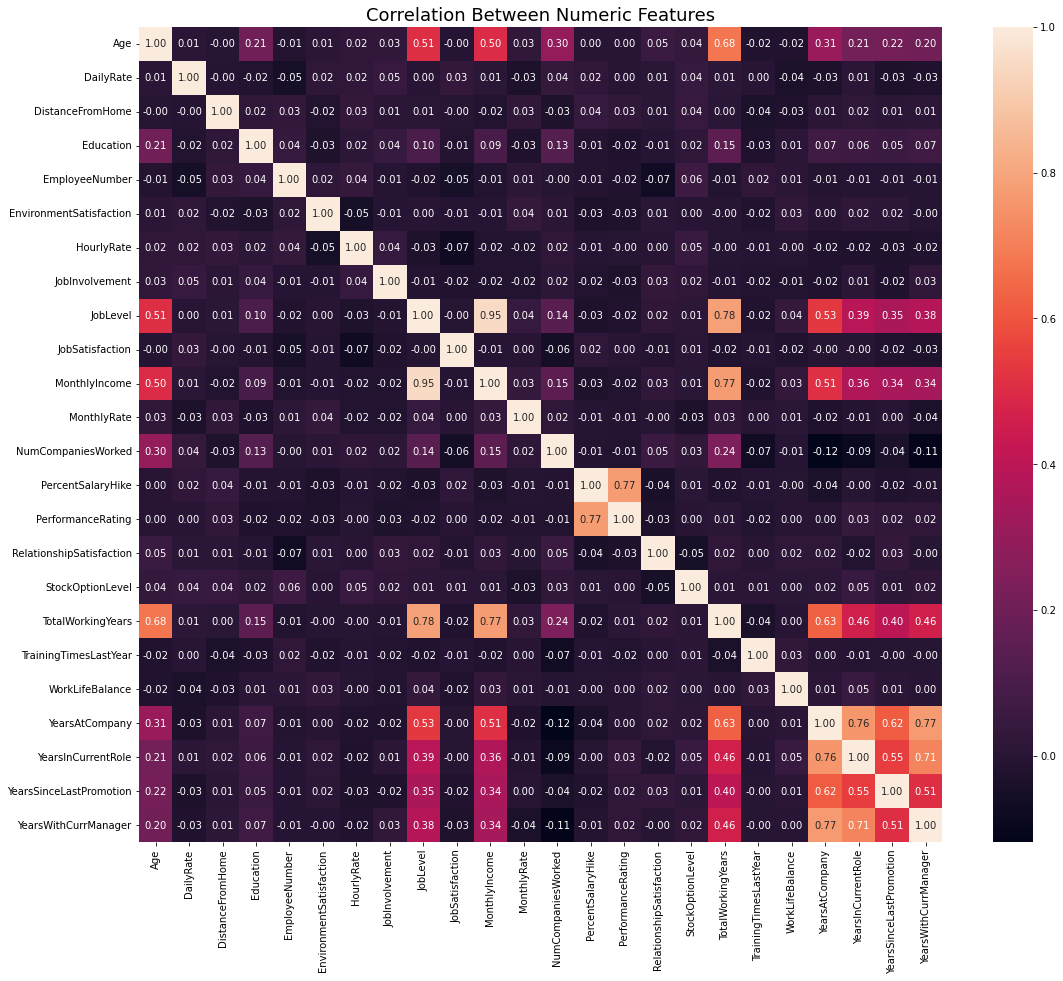

In [12]:
# Correlation Matrix
corr = numeric_cols.drop(['EmployeeCount','StandardHours'])

plt.figure(figsize=(18,15))
sns.heatmap(df[corr].corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Numeric Features', fontsize=18)

- 대체적으로 상관관계가 높은 칼럼들 끼리 다시 비교한다

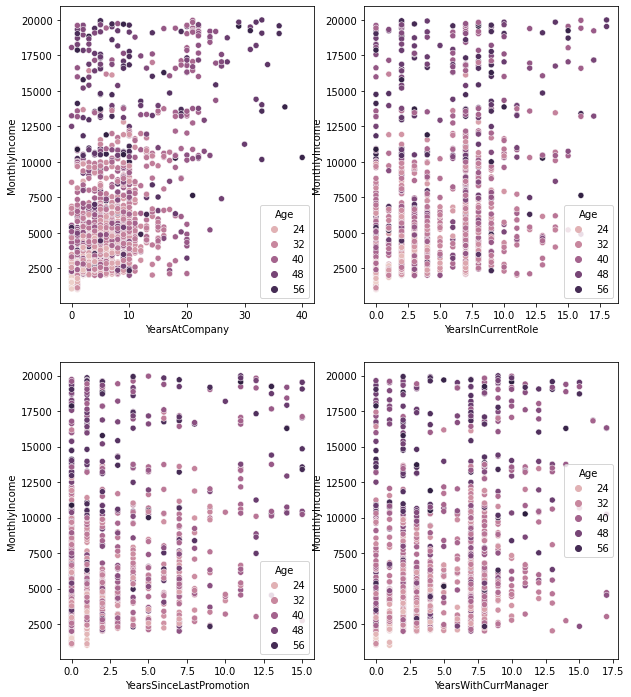

In [13]:
# 회사 근무 기간관련 데이터와 임금, 나이 데이터 비교
years_col =['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

#plt.title('Monthly Income & Working Years', fontsize=18)
plt.subplots(2,2, figsize=(10,12))

for i,col in enumerate(years_col) : 
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=df ,x=col, y='MonthlyIncome',hue='Age')

- 나이가 많은 직원들은 해당회사에서의 경력과 상관없이 대체적으로 높은 임금을 받는 것을 알 수 있다.
    - 기존의 경력을 고려하여 높은 임금 받는 것으로 추정

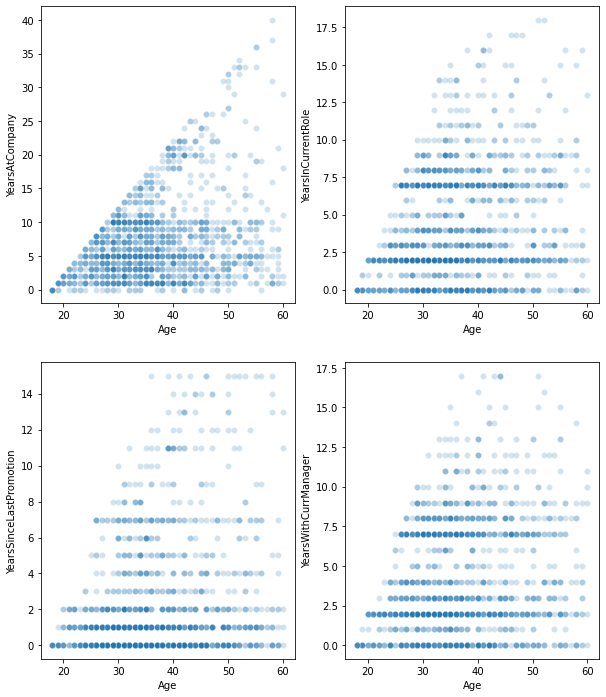

In [17]:
# 근무기간과 관련된 데이터와 나이비교
plt.subplots(2,2, figsize=(10,12))

for i,col in enumerate(years_col) : 
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df['Age'], y=df[col], alpha=0.2)

In [18]:
job_satis = df.groupby(by='JobSatisfaction').agg(mean_income = ('MonthlyIncome','mean'),
                                    mean_job_level = ('JobLevel','mean'),
                                    mean_age = ('Age','mean'))
job_satis.reset_index(inplace=True)
job_satis

,JobSatisfaction,mean_income,mean_job_level,mean_age
0,1,6561.570934,2.055363,36.916955
1,2,6527.328571,2.075000,36.985714
2,3,6480.495475,2.074661,37.022624
3,4,6472.732026,2.052288,36.795207


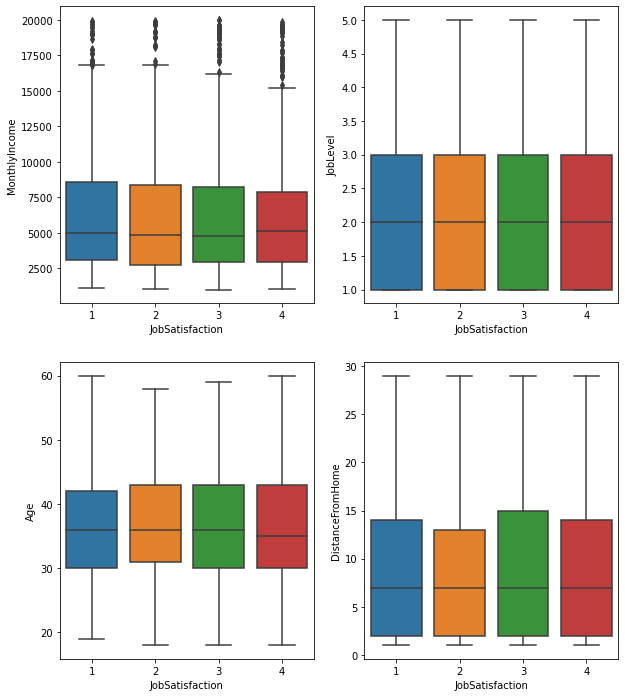

In [32]:
plt.subplots(2,2, figsize=(10,12))

box_col = ['MonthlyIncome','JobLevel','Age','DistanceFromHome']
for i,col in enumerate(box_col) : 
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x='JobSatisfaction', y=col)

- 직업만족도에 따라 평균 연봉, 직업수준, 나이가 크게 차이나지 않는 것을 확인할 수 있다.
- 그런 요소들은 직업 만족도에 큰 영향을 미치지 않는 것일까?